# The Zen of Python

* Beautiful is better than ugly.
* Explicit is better than implicit.
* Simple is better than complex.
* Complex is better than complicated.
* Flat is better than nested.
* Sparse is better than dense.
* Readability counts.
* Special cases aren't special enough to break the rules.
* Although practicality beats purity.
* Errors should never pass silently.
* Unless explicitly silenced.
* In the face of ambiguity, refuse the temptation to guess.
* There should be one-- and preferably only one --obvious way to do it.
* Although that way may not be obvious at first unless you're Dutch.
* Now is better than never.
* Although never is often better than *right* now.
* If the implementation is hard to explain, it's a bad idea.
* If the implementation is easy to explain, it may be a good idea.
* Namespaces are one honking great idea -- let's do more of those!

(from https://peps.python.org/pep-0020/)

# Quick Recap: Data Structures

In [41]:
# All python data structures are mutable or immutable
a = 4

# Quick Recap: Looping

# Exercise: Cocktail Time

Collect the following information from the data file `cocktails.json` using only one-liners:

1. the number of centiliters (cl) of lime juice needed for making a Mojito 
2. a lexicographically sorted list of all cocktail names;
3. a list of all cocktail names that have two or more colors;
4. a list of all ingredient names (and only names!) needed for a Negroni;
5. a list of the names of all cocktails that require at most 3 centiliters (cl) of orange juice.

In [42]:
import json

cocktails = json.load(open("../data/cocktails.json", "r", encoding="utf8"))

### Your code here
print([[j["amount"] for j in i["ingredients"] if j["ingredient"] == "Lime juice"] for i in cocktails if i["name"] == "Mojito"][0][0])
print(sorted([i["name"] for i in cocktails]))
print([i["name"] for i in cocktails if i["colors"][0] != "#" and len(i["colors"]) >= 2])
print([[j["ingredient"] for j in i["ingredients"]] for i in cocktails if i["name"] == "Negroni"][0])
print([i["name"] for i in cocktails if any(j.get("ingredient") == "Orange juice" and j.get("amount") <= 3 for j in i["ingredients"])])

3
['Americano', 'Angel Face', 'Aviation', 'B-52', 'Bacardi', 'Barracuda', 'Bellini', 'Between the Sheets', 'Black Russian', 'Bloody Mary', 'Bluebird', 'Bramble', 'Brandy Alexander', 'Caipirinha', 'Casino', 'Champagne Cocktail', 'Clover Club', 'Cosmopolitan', 'Cuba Libre', 'Daiquiri', "Dark 'n' Stormy", 'Derby', 'Dirty Martini', 'Dry Martini', 'Espresso Martini', 'French 75', 'French Connection', 'French Martini', 'Gimlet', 'Gin Fizz', 'Godfather', 'Godmother', 'Golden Dream', 'Grasshopper', 'Harvey Wallbanger', 'Hemingway Special', "Horse's Neck", 'Irish Coffee', 'John Collins', 'Kamikaze', 'Kir', 'Lemon Drop', 'Long Island Iced Tea', 'Mai Tai', 'Manhattan', 'Margarita', 'Mary Pickford', 'Mimosa', 'Mint Julep', 'Mojito', 'Monkey Gland', 'Moscow Mule', 'Negroni', 'Old Fashioned', 'Paradise', 'Pina Colada', 'Pisco Sour', "Planter's Punch", 'Porto Flip', 'Ramos Fizz', 'Rose', 'Russian Spring Punch', 'Rusty Nail', 'Sazerac', 'Screwdriver', 'Sea Breeze', 'Sex on the Beach', 'Sidecar', 'Sing

# Quick Recap: Classes and Functions

In [43]:
from copy import copy, deepcopy

In [44]:
def my_fun(alist):
  alist = deepcopy(alist)
  alist.append("Tricked you!")
  return alist

In [45]:
my_list = ["a", "b"]
new_list = my_fun(my_list)

In [46]:
new_list

['a', 'b', 'Tricked you!']

In [47]:
my_list

['a', 'b']

In [48]:
hex(id(new_list))

'0x26e63073980'

In [49]:
hex(id(my_list))

'0x26e63073b80'

In [ ]:
class MyClass:
  pass

c = MyClass()

# Exercise: Infectious Disease Modeling

<p>In this exercise, you will explore and implement a popular epidemiological model of infectuous disease outbreaks.</p>

<p>In particular, we will look at the SEIR model, which is an instance of the compartmental model family:</p>

![SEIR](https://docs.idmod.org/projects/emod-tuberculosis/en/latest/_images/SEIR-SEIRS.png)

<p>Compartmental models partition a population into discrete subgroups. In the case of the SEIR model, the groups are:</p>
<br>
1. S - Susceptible: People who can become infected<br>
2. E - Exposed: People who have been exposed to the virus<br>
3. I - Infected: People who have been infected by the virus<br>
4. R - Recovered: People who have recovered from the virus <br>

Needless to say, there are numerous extentions of this basic model, but it is useful for simulations and (even policy making!). The discrete-time SEIR model is given by the following set of difference equations:
$$\begin{align}
S_t &= S_{t-1} -(\beta S_{t-1} I_{t-1})/N \\
E_t &= E_{t-1} + (\beta S_{t-1} I_{t-1})/N - \sigma E_{t-1} \\
I_t &= I_{t-1} + \sigma E_{t-1} - \gamma I_{t-1} \\
R_t &= R_{t-1} + \gamma I_{t-1}
\end{align}$$

which govern the interactions between the compartments. In the continuous case, the model would be specified by a set of ordinary differential equations (ODEs). The dynamics of the process model are controled by three parameters:

1. $\beta$ - the average contact rate in the population
2. $\sigma$ - the inverse of the incubation period (1 / days_incubation)
3. $\gamma$ - the inverse of the mean infectuous period (1 / days_infectuous)

Thus, we can compute the basic reproduction number $R_0$ as
$$ R_0 = \frac{\beta}{\gamma}$$

The goal of this exercise is to implement the discrete-time SEIR model as a function which takes an input the initial conditions and a vector of parameters and returns the four timeseries of S, E, I, and R people.
Once your code works, create a separate module and commit it to a repository.

In [3]:
import matplotlib.pyplot as plt


def plot_results(infected):
    """Plots the time series of infected cases."""
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(infected, color='#AA0000', linestyle='dashed', marker='o')
    ax.set_xlabel('Day', fontsize=16)
    ax.set_ylabel('Number of Infected Cases', fontsize=16)
    ax.set_title('Simulated Oubreak', fontsize=20)
    ax.grid(alpha=0.2)
    return fig

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
def simulate_seir(parameters, initial_conditions, days=51):
    """TODO"""

    # Extract parameters and initial conditions (Your code here)
    beta, sigma, gamma = parameters
    S0, E0, I0, R0 = initial_conditions

    ### Your code here
    
    # For each day, perform SEIR update
    for t in range(1, days):

        pass
        ### Your code here

    ### Your code here

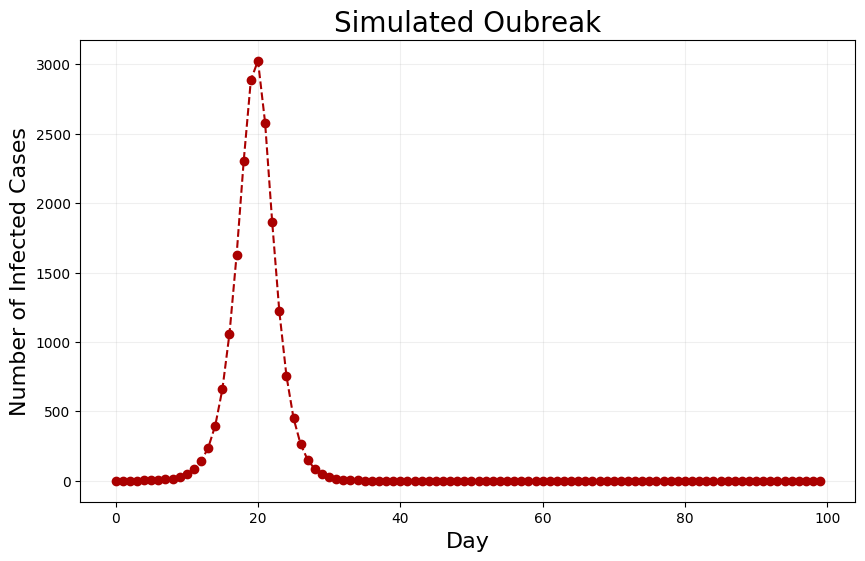

In [ ]:
parameters = (3, 0.5, 0.5)

# S0, E0, I0, R0
inits = (9999., 1., 0., 0.)

### Your code here
sim = simulate_seir(parameters, inits, 100)

### Expected result
f = plot_results(sim[2])